In [1]:
# import libraries + data

from PIL import Image, ImageOps, ImageDraw, ImageFont
import pandas as pd
import math
from datetime import datetime, timedelta

sales_data = pd.read_excel('Last Weeks Sales.xlsx')

sales_data

,Seller Name,Manager,Last Week's Sales
0,Sarah Simon,Marie Curie,4398
1,Jonathan Beltross,Julian Schwinger,2980
2,Alexander Anya,Julian Schwinger,990
3,Moe Raza,Ada Lovelace,755
4,Carmen Martinez,David Griffiths,600
5,Farida Guory,Shinichiro Tomonaga,575
6,Sabah Goki,Richard Feynman,570
7,Charles Wang,Shinichiro Tomonaga,550
8,Jorge Silva,David Griffiths,400
9,Jihan Homan,Shinichiro Tomonaga,345


In [2]:
# create a bunch of functions that will generate icons for each headshot, text with name and won sales

path_to_headshots = 'headshots/'

def icon(seller, image_size):
    
    # takes the seller name and a number for the image size and returns a round icon of their headshot
    # size depends on if they're a seller or manager
    # and there's different file types so the function looks for the right one using a loop
    
    # grabs the image using path_to_headshots
    # our file names are based on the name of the seller, and we pull the image by joining strings together
    
    file_types = ['.jpg', '.png', '.jpeg']
    
    for i in file_types:
        try:
            image_path = path_to_headshots + seller + i
            im = Image.open(image_path).convert('RGBA')
            break
            
        # the lines below are for if there's no image for the name, use a placeholder picture 
        except:
            image_path = 'placeholder.jpg'
            im = Image.open(image_path)
            continue

    # start to make the photo square
    width,height = im.size
    crop_size = min(width,height)
    
    #length to crop from each side
    left = (width - crop_size)/2
    right = (width + crop_size)/2
    top = (height - crop_size)/2
    bottom = (height + crop_size)/2
    
    im = im.crop((left,top,right,bottom))
    
    # resize icon depending on image_size
    # we can also rotate the image by adding a rotation column in the sales_data table
    im = im.resize((image_size,image_size), Image.ANTIALIAS)
    #im = im.rotate(0)
    
    #create a round border
    bigsize = (image_size*3,image_size*3)
    mask = Image.new('L', bigsize, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0,0) + bigsize, fill=255)
    mask = mask.resize(im.size, Image.ANTIALIAS)
    im.putalpha(mask)
    
    return im


def seller_label(i, seller, sales):
    
    # this function takes the table index, seller name, and sales for each seller in the leaderboard
    # and returns a text that we use a label next to their picture
    # it will look like "1. Sarah Simon: $4,398"
    
    sales = "{:,d}".format(sales)
    full_label = "%i. %s: $%s" %(i+1, seller, sales)
    
    # we can also shorten the label if it's too long
    if len(full_label) >= 25:
        space_index_plus_2 = seller.index(' ') + 2
        shortened_name = seller[:space_index_plus_2]+'.'
        shortened_label = "%i. %s: $%s" %(i+1, shortened_name, sales)
        return shortened_label
    
    else:
        return full_label
    

def week_range(start_week, end_week):
    
    # this function takes the beginning + end dates of last week and creates a string to state the range
    # the string changes depending on if the months between the start and end of the week are different
    # or if the year is different
    # for example: January 5th - 11th, 2020 or December 29th, 2019 - January 4th, 2020
    
    s_day = start_week.strftime('%d').lstrip('0')
    s_month = start_week.strftime('%B')
    s_year = start_week.strftime('%Y')
    e_day = end_week.strftime('%d').lstrip('0')
    e_month = end_week.strftime('%B')
    e_year = end_week.strftime('%Y')
    
    # next line I googled, provides the "st" in 1st, "nd" in 2nd
    # source: https://stackoverflow.com/questions/9647202/ordinal-numbers-replacement
    ordinal = lambda n: "%d%s" %(n, "tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
    
    # pairs of text that will change
    start_month_day = "%s %s"%(s_month,ordinal(int(s_day)))
    start_month_day_year = "%s %s %s"%(s_month, ordinal(int(s_day))+",", s_year)
    end_day_year = "%s %s"%(ordinal(int(e_day))+",", e_year)
    end_month_day_year = "%s %s %s"%(e_month, ordinal(int(e_day))+",", e_year)
    
    # final text based on which parts of the dates are different
    if s_month == e_month:
        return start_month_day + " - " + end_day_year
    elif s_year != e_year:
        return start_month_day_year + " - " + end_month_day_year
    elif s_month != e_month:
        return start_month_day + " - " + end_month_day_year

In [3]:
# obtain last week using today's date

todays_date = datetime.now().date()
start_week = todays_date - timedelta(days=todays_date.weekday()) - timedelta(days=8)
end_week = start_week + timedelta(days=6)

start_week, end_week

(datetime.date(2020, 2, 2), datetime.date(2020, 2, 8))

In [4]:
Top10 = sales_data.head(10)
Top10

,Seller Name,Manager,Last Week's Sales
0,Sarah Simon,Marie Curie,4398
1,Jonathan Beltross,Julian Schwinger,2980
2,Alexander Anya,Julian Schwinger,990
3,Moe Raza,Ada Lovelace,755
4,Carmen Martinez,David Griffiths,600
5,Farida Guory,Shinichiro Tomonaga,575
6,Sabah Goki,Richard Feynman,570
7,Charles Wang,Shinichiro Tomonaga,550
8,Jorge Silva,David Griffiths,400
9,Jihan Homan,Shinichiro Tomonaga,345


In [5]:
# prepare the background

background_image = Image.open('background2.jpg')
background_image = background_image.resize((1200,750) ,Image.ANTIALIAS)
base = Image.new('RGB', background_image.size)
base.paste(background_image)

#text
title_text = ImageFont.truetype('C:\Windows\Fonts\Calibrib.ttf', 55)
date_text = ImageFont.truetype('C:\Windows\Fonts\Calibril.ttf', 40)
date_bold_text = ImageFont.truetype('C:\Windows\Fonts\Calibrib.ttf', 40)
name_text = ImageFont.truetype('C:\Windows\Fonts\Calibrib.ttf', 25)

ImageDraw.Draw(base).text((14,170), 'Top 10 Sales\nChampions', 'rgb(29,94,11)', font=title_text, spacing=10)

week_range_str = week_range(start_week,end_week)

ImageDraw.Draw(base).text((15,350), 'Total Sales won \nin the Week of', 'rgb(0,0,0)', font=date_text, spacing=14)
ImageDraw.Draw(base).text((15,434), week_range_str[:14]+'\n'+week_range_str[14:], 'rgb(50,50,50)', font=date_bold_text, spacing=14)

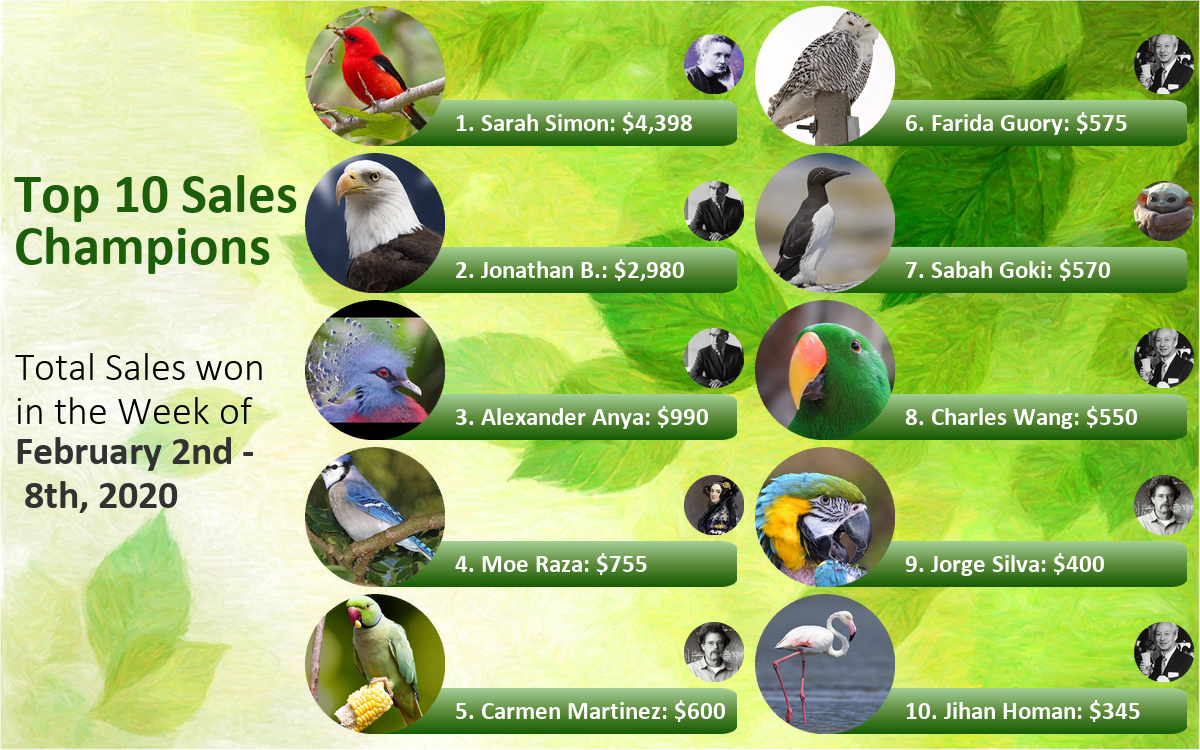

In [6]:
# loop in each seller + their manager photos

manager_icon_size = 60
seller_icon_size = 140

text_background_import = Image.open('name_block2.png')
text_background_import.convert('RGBA')
text_background_import = text_background_import.resize((int(text_background_import.size[0]*0.55), int(text_background_import.size[1]*0.25)),Image.ANTIALIAS)
text_background = Image.new('RGBA', text_background_import.size, (255,255,255,0))
text_background.paste(text_background_import)

for i in Top10.index:
    
    seller_name = Top10['Seller Name'][i]
    seller_icon = icon(seller_name, seller_icon_size)
    
    manager_name = Top10['Manager'][i]
    manager_icon = icon(manager_name, manager_icon_size)
    
    sales = int(round(Top10["Last Week's Sales"][i],0))
    name_sales_text = seller_label(i, seller_name, sales)
    
    if i < 5:
        j = i
        k = 0
    if i >=5:
        j = i-5
        k = 450
        
    base.paste(text_background, (360+k, 100+j*147), text_background)
    base.paste(seller_icon, (305+k,6+j*147), seller_icon)
    base.paste(manager_icon, (684+k,34+j*147), manager_icon)
    ImageDraw.Draw(base).text((455+k, 112+j*147), name_sales_text, font=name_text)
        
base

In [7]:
# we can also save our data weekly, to keep just in case
# Sometimes I get emails from sellers asking if I know how many times they've appeared in the Top 10 list,
# so it's nice that I have the information readily available :)

previous_data = pd.read_excel('Sales History.xlsx')

sales_data['Week'] = start_week
previous_data = previous_data[previous_data['Week'] != pd.Timestamp(start_week)] #avoids entering the week two times
previous_data = previous_data.append(sales_data, ignore_index = False, sort=False)

previous_data.to_excel('Sales History.xlsx', index=False)

previous_data = pd.read_excel('Sales History.xlsx')